In [139]:
import torch.nn as nn ,torch,torch.nn.functional as f, sklearn.datasets
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset,DataLoader

In [140]:
x,y = sklearn.datasets.make_moons(n_samples=500,noise=0.1,random_state=42)

print(x.shape,y.shape)

(500, 2) (500,)


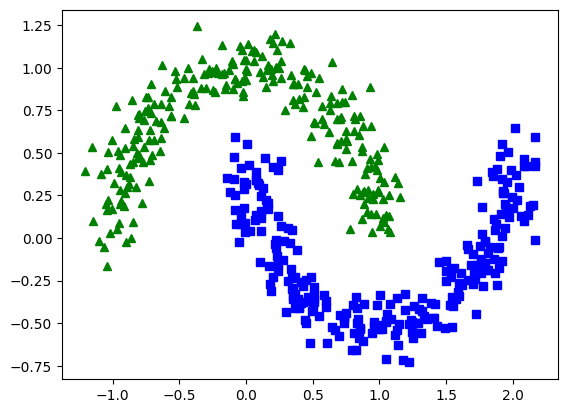

In [141]:
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs")
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "g^")

In [142]:
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

dataset = TensorDataset(x,y)

data = DataLoader(dataset,batch_size=23,shuffle=True)

In [143]:
def accuracy(y_true, y_pred):
    correct = (y_true == y_pred).float().sum()
    accuracy = correct / y_true.shape[0]
    return accuracy.item()

# Model 1

In [144]:
class Classfier_1(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=6):
        super(Classfier_1, self).__init__()
        self.layer1 = nn.Linear(2, 6)
        self.layer2 = nn.Linear(6, 1)

    def forward(self, x):
        x = f.relu(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x

bin_class = Classfier_1()

print(bin_class)

Classfier_1(
  (layer1): Linear(in_features=2, out_features=6, bias=True)
  (layer2): Linear(in_features=6, out_features=1, bias=True)
)


In [145]:
import torch.optim as opt

optim = opt.SGD(bin_class.parameters(),lr=0.01,momentum=0.8)
loss_cri = nn.BCEWithLogitsLoss()
sch = opt.lr_scheduler.ExponentialLR(optim,gamma=0.9)

In [146]:
# Number of epochs
epochs = 200
acc,losses = [],[]
# Start training
for epoch in range(epochs):
    for inputs, labels in data:
        optim.zero_grad()
        outputs = bin_class(inputs)
        out = torch.where(outputs >= 0.5, 1, 0).reshape(1,-1)[0].float()
        loss = loss_cri(out, labels)
        loss.requires_grad = True
        loss.backward()
        optim.step()
    losses.append(loss.item())
    if epoch%10==0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
      acc.append(accuracy(out,labels))

Epoch [1/200], Loss: 0.8427
Epoch [11/200], Loss: 0.7250
Epoch [21/200], Loss: 0.7250
Epoch [31/200], Loss: 0.9015
Epoch [41/200], Loss: 0.6074
Epoch [51/200], Loss: 0.8427
Epoch [61/200], Loss: 0.7250
Epoch [71/200], Loss: 0.8427
Epoch [81/200], Loss: 0.7838
Epoch [91/200], Loss: 0.8427
Epoch [101/200], Loss: 0.8427
Epoch [111/200], Loss: 0.8427
Epoch [121/200], Loss: 0.8427
Epoch [131/200], Loss: 0.7838
Epoch [141/200], Loss: 0.6662
Epoch [151/200], Loss: 0.7250
Epoch [161/200], Loss: 1.0780
Epoch [171/200], Loss: 0.8427
Epoch [181/200], Loss: 0.7250
Epoch [191/200], Loss: 0.6662


In [147]:
print(out,labels,sep="\n")

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.])


In [148]:
#max Accuracy
print(max(acc))

0.8823529481887817


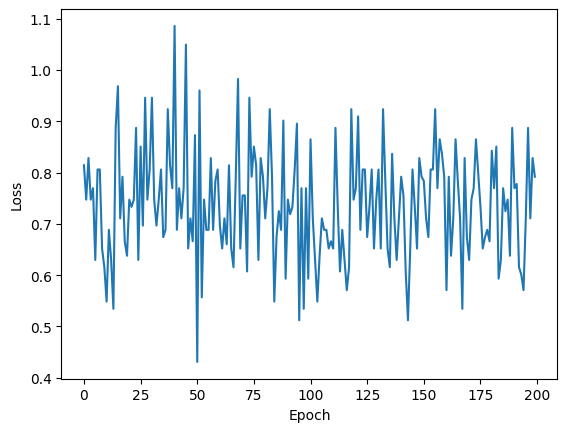

In [149]:
import matplotlib.pyplot as plt
# Plot the losses for model_3
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# Model 2

In [150]:
class Classfier_2(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=6):
        super(Classfier_2, self).__init__()
        self.layer1 = nn.Linear(2, 6)
        self.layer2 = nn.Linear(6, 4)
        self.layer3 = nn.Linear(4, 1)
        self.layer4 = nn.ReLU()

    def forward(self, x):
        x = f.relu(self.layer1(x))
        x = f.relu(self.layer2(x))
        x = f.sigmoid(self.layer3(x))
        x = f.sigmoid(self.layer4(x))
        return x

bin_class_2 = Classfier_2()

print(bin_class)

Classfier_1(
  (layer1): Linear(in_features=2, out_features=6, bias=True)
  (layer2): Linear(in_features=6, out_features=1, bias=True)
)


In [151]:
# Number of epochs
epochs = 200
acc,losses = [],[]
# Start training
for epoch in range(epochs):
    for inputs, labels in data:
        optim.zero_grad()
        outputs = bin_class_2(inputs)
        out = torch.where(outputs >= 0.5, 1, 0).reshape(1,-1)[0].float()
        loss = loss_cri(out, labels)
        loss.requires_grad = True
        loss.backward()
        optim.step()
    losses.append(loss.item())
    if epoch%10==0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
      acc.append(accuracy(out,labels))

Epoch [1/200], Loss: 0.7838
Epoch [11/200], Loss: 0.7250
Epoch [21/200], Loss: 0.7250
Epoch [31/200], Loss: 0.9015
Epoch [41/200], Loss: 0.9015
Epoch [51/200], Loss: 0.8427
Epoch [61/200], Loss: 0.7250
Epoch [71/200], Loss: 0.9015
Epoch [81/200], Loss: 0.6662
Epoch [91/200], Loss: 0.7838
Epoch [101/200], Loss: 0.9603
Epoch [111/200], Loss: 0.9015
Epoch [121/200], Loss: 0.7838
Epoch [131/200], Loss: 1.0191
Epoch [141/200], Loss: 1.0780
Epoch [151/200], Loss: 0.9015
Epoch [161/200], Loss: 0.8427
Epoch [171/200], Loss: 0.7838
Epoch [181/200], Loss: 0.9015
Epoch [191/200], Loss: 0.6074


In [152]:
#max Accuracy
print(max(acc))

0.7058823704719543


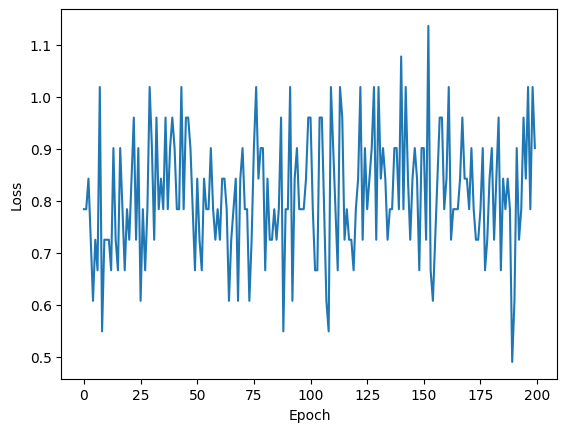

In [153]:
import matplotlib.pyplot as plt
# Plot the losses for model_3
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# Model 3

In [154]:
class Classfier_3(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=6):
        super(Classfier_3, self).__init__()
        self.layer1 = nn.Linear(2, 6)
        self.layer2 = nn.Linear(6, 1)
        self.layer3 = nn.ReLU()

    def forward(self, x):
        x = f.relu(self.layer1(x))
        x = f.relu(self.layer2(x))
        x = f.sigmoid(self.layer3(x))
        return x

bin_class_3 = Classfier_3()

print(bin_class)

Classfier_1(
  (layer1): Linear(in_features=2, out_features=6, bias=True)
  (layer2): Linear(in_features=6, out_features=1, bias=True)
)


In [155]:
# Number of epochs
epochs = 200
acc,losses = [],[]
# Start training
for epoch in range(epochs):
    for inputs, labels in data:
        optim.zero_grad()
        outputs = bin_class_3(inputs)
        out = torch.where(outputs >= 0.5, 1, 0).reshape(1,-1)[0].float()
        loss = loss_cri(out, labels)
        loss.requires_grad = True
        loss.backward()
        optim.step()
    losses.append(loss.item())
    if epoch%10==0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
      acc.append(accuracy(out,labels))

Epoch [1/200], Loss: 0.7250
Epoch [11/200], Loss: 0.9603
Epoch [21/200], Loss: 0.7250
Epoch [31/200], Loss: 0.8427
Epoch [41/200], Loss: 0.6662
Epoch [51/200], Loss: 0.9015
Epoch [61/200], Loss: 0.6074
Epoch [71/200], Loss: 0.7250
Epoch [81/200], Loss: 0.6662
Epoch [91/200], Loss: 0.9015
Epoch [101/200], Loss: 0.8427
Epoch [111/200], Loss: 0.9015
Epoch [121/200], Loss: 0.8427
Epoch [131/200], Loss: 0.8427
Epoch [141/200], Loss: 0.7250
Epoch [151/200], Loss: 0.7250
Epoch [161/200], Loss: 0.6662
Epoch [171/200], Loss: 0.6074
Epoch [181/200], Loss: 0.8427
Epoch [191/200], Loss: 0.8427


In [156]:
#max Accuracy
print(max(acc))

0.7058823704719543


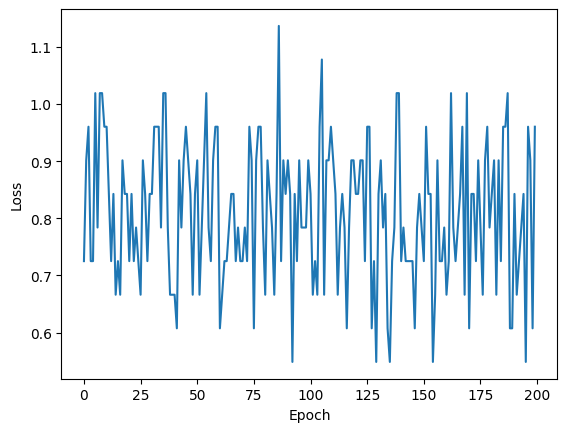

In [157]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


#Comparing other models,  Model 1 gave better results.
